In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2 as cv
import random

In [82]:
IMG_SIZE = 80
Pet_Dir = '/home/samarth/Documents/Machine_Learning/Data/PetImages'
Categories = ['Dog','Cat']
train_data = []
z = 0
for category in Categories:
    path = os.path.join(Pet_Dir,category)
    for i in os.listdir(path):
        try:
            img = cv.imread(os.path.join(path,i))
            new_image = cv.resize(img,(IMG_SIZE,IMG_SIZE))
            train_data.append([new_image,Categories.index(category)])
        except Exception as e:
            pass

[0 1]


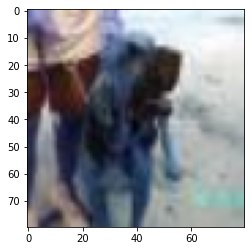

In [95]:
random.shuffle(train_data)
Train_Labels = []
Train_Data = []
test_labels = []
test_data = []
for i in range(len(train_data)):
    if i < 24500:
        Train_Data.append(train_data[i][0])
        Train_Labels.append(train_data[i][1])
    else:
        test_data.append(train_data[i][0])
        test_labels.append(train_data[i][1])
Train_Data = np.array(Train_Data)
test_data = np.array(test_data)
test_labels = np.array(test_labels)
Train_Labels = np.array(Train_Labels)
plt.imshow(Train_Data[535])
print(np.unique(test_labels))

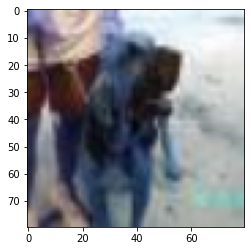

In [96]:
Train_Data = Train_Data / 255.0
test_data = test_data / 255.0
plt.imshow(Train_Data[535])


In [97]:
base_model = keras.applications.MobileNetV2(input_shape=(80,80,3),include_top=False,weights='imagenet')
base_model.trainable = False

pool_layer = keras.layers.GlobalAvgPool2D()
predict_layer = keras.layers.Dense(1,)

model = keras.Sequential([
    base_model,
    pool_layer,
    predict_layer
])
print(Train_Data[2].shape)

(80, 80, 3)


In [98]:
model.compile( metrics=['accuracy'],loss=keras.losses.BinaryCrossentropy(from_logits=True),optimizer=keras.optimizers.RMSprop(lr=0.0001))

In [99]:
his = model.fit(Train_Data,Train_Labels,epochs=3,)

Epoch 1/3
766/766 [==============================] - 44s 57ms/step - loss: 0.5313 - accuracy: 0.7318

In [102]:
# print(his.history['accuracy'])
loss_,acc_ = model.evaluate(test_data,test_labels)
print(acc_)

14/14 [==============================] - 1s 52ms/step - loss: 0.3382 - accuracy: 0.8430

In [ ]:
model.save('main_model',overwrite=True)
# print(his.history)
# loss,acc = model.evaluate(test_data,test_labels)

Cat


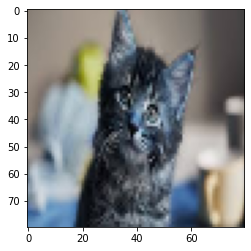

In [149]:
# img = test_data[15]
img = cv.imread('asd.jpeg')
img = keras.preprocessing.image.img_to_array(img)
new_image = cv.resize(img,(IMG_SIZE,IMG_SIZE))
new_image = new_image / 255.0
label = test_labels[15]
predict = model.predict(np.array([new_image]))
# print(label)
if(predict[0][0] > 0):
    print("Cat")
else:
    print("Dog")
plt.imshow(new_image)
